In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

## Read the data

In [3]:
!ls *.csv

owid_literacy.csv		wef_primary_enrolment.csv
wef_earned_income.csv		wef_primary_enrolment_table.csv
wef_earned_income_table.csv	wef_professional_and_technical_workers.csv
wef_economic_participation.csv	wef_secondary_enrolment.csv
wef_educational_attainment.csv	wef_secondary_enrolment_table.csv
wef_labour_participation.csv	wef_tertiary_enrolment.csv
wef_legislators.csv		wef_tertiary_enrolment_table.csv
wef_literacy_rate.csv		wef_wage_equality.csv
wef_literacy_rate_table.csv


In [4]:
xlabel = 'Wage equality'

In [5]:

import os
from extract_pdf_data import read_pdfs

filename = "wef_wage_equality.csv"
if not os.path.exists(filename):
    df = read_pdfs('wage equality')
    df.to_csv(filename, index=False)

In [6]:
from utils import read_wef_file

df = read_wef_file(filename)
df.head()

,country,page_number,score,rank,diff,left,right
code,,,,,,,
ALB,Albania,83,0.858,1.0,NaN,NaN,NaN
DZA,Algeria,85,0.816,4.0,NaN,NaN,NaN
AGO,Angola,87,0.586,107.0,NaN,NaN,NaN
ARG,Argentina,89,0.612,88.0,NaN,NaN,NaN
ARM,Armenia,91,0.694,45.0,NaN,NaN,NaN


In [7]:
df['rank'].value_counts(dropna=False).head()

rank
NaN      23
1.0       1
107.0     1
4.0       1
88.0      1
Name: count, dtype: int64

In [8]:
df['score'].describe()

count    123.000000
mean       0.664098
std        0.078769
min        0.478000
25%        0.607000
50%        0.659000
75%        0.723000
max        0.858000
Name: score, dtype: float64

In [9]:
dinged = df['score'] < 1
dinged.sum()

np.int64(123)

Here is the distribution of their scores.

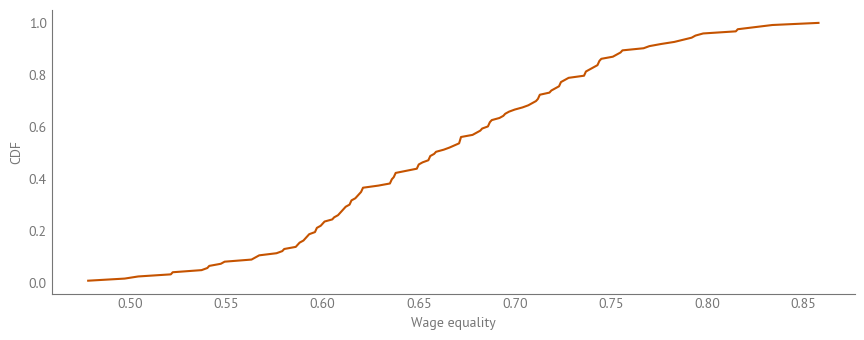

In [10]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel=xlabel, ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

In [11]:
#cdf_difference_fm = Cdf.from_seq(df['diff'])
#cdf_difference_fm.plot()
#decorate(xlabel='Primary Enrolment Difference FM', ylabel='CDF')

In [12]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right
code,,,,,,,
ALB,Albania,83,0.858,1.0,NaN,NaN,NaN
DZA,Algeria,85,0.816,4.0,NaN,NaN,NaN
AGO,Angola,87,0.586,107.0,NaN,NaN,NaN
ARG,Argentina,89,0.612,88.0,NaN,NaN,NaN
ARM,Armenia,91,0.694,45.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
URY,Uruguay,363,0.666,60.0,NaN,NaN,NaN
UZB,Uzbekistan,365,0.792,9.0,NaN,NaN,NaN
VNM,Vietnam,369,0.726,28.0,NaN,NaN,NaN


## Revised scores

The scores are based on ratios, not differences, so let's compute those.

In [13]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ratio, dtype: float64

Looks like the ratio IS the score.

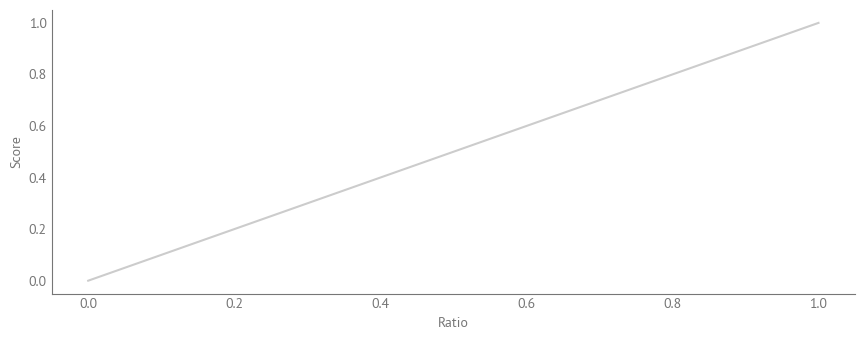

In [14]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')

Without data, we have to accept the original scores as revised scores.

In [26]:
df['revised_score'] = df['score']
df['revised_score'].describe()

count    123.000000
mean       0.664098
std        0.078769
min        0.478000
25%        0.607000
50%        0.659000
75%        0.723000
max        0.858000
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

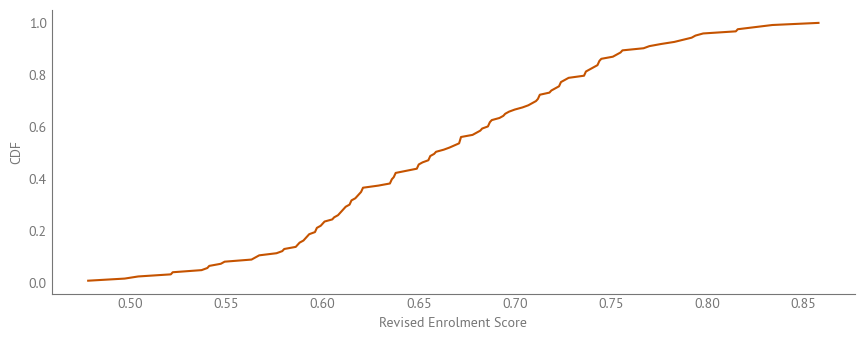

In [28]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

Here's the distribution of revised scores, compare to the original.

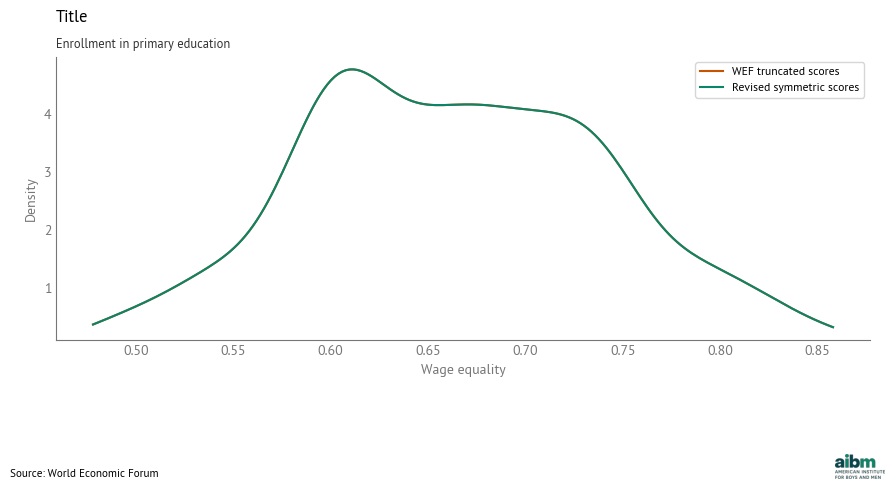

In [30]:
from utils import plot_score_distributions, add_title

plot_score_distributions(df, xlabel=xlabel)
add_title("Title",
          "Enrollment in primary education")

In [31]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(0, 10)

In [32]:
from utils import plot_revised_scores

#plot_revised_scores(revised)

## Export the results

In [33]:
from utils import make_rank_table

table = make_rank_table(df)
table.to_csv("wef_wage_equality_table.csv")
table.shape

(146, 6)

In [34]:
table['score'].describe()

count    123.000000
mean       0.664098
std        0.078769
min        0.478000
25%        0.607000
50%        0.659000
75%        0.723000
max        0.858000
Name: score, dtype: float64

In [35]:
from utils import make_weight_table

make_weight_table(table, 'professional')

original             revised          
                   std   inv std       std   inv std
professional  0.078769  0.126953  0.078769  0.126953

## OECD countries

In [36]:
from utils import oecd_codes

df_oecd = df.loc[oecd_codes].sort_values(by='revised_score')

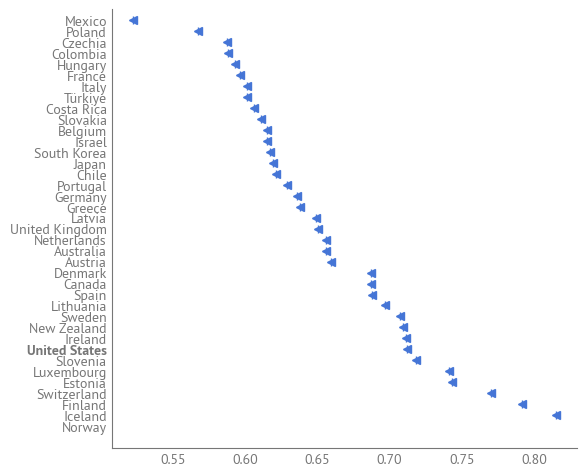

In [37]:
plot_revised_scores(df_oecd)

In [38]:
df.query("country == 'Ireland'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score,revised_rank
code,,,,,,,,,,
IRL,Ireland,211,0.711,38.0,NaN,NaN,NaN,NaN,0.711,38.0
